# Absolute Coverage Difference

The absolute coverage difference is the absolute difference between average coverage and the target coverage level.

For example if the average coverage is 93% and the target is a 95% coverage then the absolute coverage difference is

$|0.93 - 0.95| = 0.02$

## Imports

In [1]:
import pandas as pd
import numpy as np
from forecast_tools.metrics import coverage
from forecast_tools.baseline import SNaive, Naive1

import warnings
warnings.filterwarnings('ignore')

## Helper functions

In [2]:
def preds_as_series(data, preds):
    '''
    Helper function for plotting predictions.
    Converts a numpy array of predictions to a 
    pandas.DataFrame with datetimeindex
    
    Parameters
    -----
    data - arraylike - the training data
    preds - numpy.array, vector of predictions 
    
    Returns:
    -------
    pandas.DataFrame
    '''
    start = pd.date_range(start=data.index.max(), periods=2, 
                          freq=data.index.freq).max()
    idx = pd.date_range(start=start, periods=len(preds), freq=data.index.freq)
    return pd.DataFrame(preds, index=idx)

In [3]:
def plot_prediction_intervals(train, preds, intervals, 
                              test=None, figsize=(12,4)):
    '''
    Helper function to plot training data, point preds
    and 2 sets of prediction intevals
    
    assume 2 sets of PIs are provided!
    '''
    ax = train.plot(figsize=figsize)

    mean = preds_as_series(train, preds)
    intervals_80 = preds_as_series(train, intervals[0])
    intervals_90 = preds_as_series(train, intervals[1])

    mean.plot(ax=ax, label='point forecast')

    ax.fill_between(intervals_80.index, mean[0], intervals_80[1], 
                    alpha=0.2,
                    label='80% PI', color='yellow');

    ax.fill_between(intervals_80.index,mean[0], intervals_80[0], 
                    alpha=0.2,
                    label='80% PI', color='yellow');

    ax.fill_between(intervals_80.index,intervals_80[1], intervals_90[1], 
                    alpha=0.2,
                    label='90% PI', color='purple');

    ax.fill_between(intervals_80.index,intervals_80[0], intervals_90[0], 
                    alpha=0.2,
                    label='90% PI', color='purple');
    
    if test is None:
        ax.legend(['train', 'point forecast', '80%PI', '_ignore','_ignore', '90%PI'], loc=2)
    else:
        test.plot(ax=ax, color='black')
        ax.legend(['train', 'point forecast', 'Test', '80%PI', '_ignore','_ignore', '90%PI'], loc=2)

## Implementation

In [4]:
def absolute_coverage_difference(y_true, pred_intervals, target=0.95):
    mean_coverage = coverage(y_true, pred_intervals)
    return abs(mean_coverage - target)

# Example usage

In [5]:
TARGET = 0.80
URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
        + 'hpdm097-datasets/master/out_appoints_mth.csv'

In [6]:
appoints = pd.read_csv(URL, index_col='date', parse_dates=True, dayfirst=True)
appoints.index.freq = 'MS'

In [7]:
train = appoints[:-6]
test = appoints[-6:]

In [8]:
model = SNaive(12)
# returns 80 and 90% prediction intervals by default.
preds, intervals = model.fit_predict(train, 6, return_predict_int=True)

In [9]:
# 80% prediction intervals 
intervals[0]

array([[37520.96642201, 58225.03357799],
       [29059.96642201, 49764.03357799],
       [47325.96642201, 68030.03357799],
       [36432.96642201, 57137.03357799],
       [35865.96642201, 56570.03357799],
       [33419.96642201, 54124.03357799]])

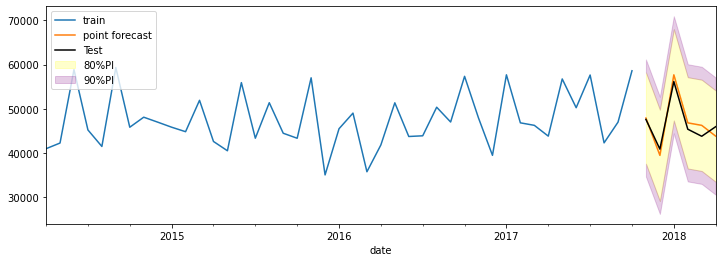

In [10]:
# take a look at the prediction intervals - 100% coverage at the 80% level!
plot_prediction_intervals(train, preds, intervals, test)

In [11]:
# absolute coverage difference is big!
absolute_coverage_difference(test.to_numpy().T[0], intervals[0], target=TARGET)

0.19999999999999996

In [12]:
# just for completeness - here is the coverage calculation.
coverage(test.to_numpy().T[0], intervals[0])

1.0